# <center>P1 PNV3421
## <center>11180872 - Diôgo Cavalcante Rodrigues Lopes
## <center>10334791 - Giulia Palin

## <center>Tratamento de dados</center>
<ul>
<li>Ordenação dos Dados</li>
<li>Avaliação Descritiva</li>
<li>Visualização dos Dados</li>
<li>Limpeza dos Dados</li>
<li>Agrupamento</li>
<li>Seleção da distribuição de Probabilidade</li>
</ul>
    
## 1. Ordenação de Dados
    Iniciando-se pela ordenação dos dados, será realizado uma análise para verificar erros ou omissões de preenchimento.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

In [2]:
base_dados = pd.read_excel('Base_Dados_Navios (1).xlsx')
base_dados.head()

,Emb.,Píer,DWT,Tons Plano 1,Qtde. Movimentada 1,OPE 1,Tons Plano 2,Qtde. Movimentada 2,OPE 2,Tons Plano 3,...,Atracação,Início,Término,Desatracação,TX CO,TX EF,Estadia,Pre Op,Pos Op,Mês
0,2014-12240,02,171039.0,77000,76627,SFHT,91150,91530,SSFT,0,...,31/12/2014 14:44,31/12/2014 15:15,01/01/2015 05:06,01/01/2015 05:50,11136.225166,12803.832487,7 D 08:38',0.516667,0.733333,1
1,2014-11601,1N,57903.0,41537,41537,AF08,0,0,0,0,...,31/12/2014 19:35,31/12/2014 19:45,01/01/2015 07:01,01/01/2015 09:20,3020.872727,5769.027778,10 D 18:38',0.166667,2.316667,1
2,2014-11600,1S,53828.0,38608,38659,AF08,0,0,0,0,...,01/01/2015 16:05,01/01/2015 16:40,02/01/2015 03:20,02/01/2015 05:20,2917.660377,7340.316456,10 D 21:32',0.583333,2.000000,1
3,2014-11693,02,176508.0,58100,58138,SSFT,114777,115287,SSFT,0,...,01/01/2015 08:30,01/01/2015 21:15,02/01/2015 13:00,02/01/2015 14:15,5829.411765,11797.619048,22 D 00:25',12.750000,1.250000,1
4,2014-11692,02,180132.0,31600,31700,AF08,140170,140112,SSFT,0,...,02/01/2015 16:40,02/01/2015 16:52,03/01/2015 10:16,03/01/2015 11:00,9371.563636,12042.897196,8 D 14:25',0.200000,0.733333,1


In [4]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Emb.                 559 non-null    object 
 1   Píer                 559 non-null    object 
 2   DWT                  559 non-null    float64
 3   Tons Plano 1         559 non-null    int64  
 4   Qtde. Movimentada 1  559 non-null    int64  
 5   OPE 1                559 non-null    object 
 6   Tons Plano 2         559 non-null    int64  
 7   Qtde. Movimentada 2  559 non-null    int64  
 8   OPE 2                559 non-null    object 
 9   Tons Plano 3         559 non-null    int64  
 10  Qtde. Movimentada 3  559 non-null    int64  
 11  OPE 3                559 non-null    object 
 12  Tons Plano 4         559 non-null    int64  
 13  Qtde. Movimentada 4  559 non-null    int64  
 14  OPE 4                559 non-null    object 
 15  Tons Plano           559 non-null    int

Verifica-se que as colunas relacionadas a datas e hora como por exemplo as de aceite, chegada e estadia não estão num formato adequado para análise, elas necessitam serem transformadas em **datetime**, pode-se constatar na análise anterior que não existem valores *null* na base de dados, contudo pode haver erros de preenchimento.

<h4>Correção dos campos de formato datetime</h4>

In [6]:
base_dados.describe()

,DWT,Tons Plano 1,Qtde. Movimentada 1,Tons Plano 2,Qtde. Movimentada 2,Tons Plano 3,Qtde. Movimentada 3,Tons Plano 4,Qtde. Movimentada 4,Tons Plano,Qtde. Movimentada,Volume Balança,Volume Arqueado,Balança/Plano,Balança/QtdeMov,TX CO,TX EF,Pre Op,Pos Op,Mês
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,199880.207871,142579.534884,142378.093023,42499.656530,42494.636852,1768.497317,1770.567084,303.202147,303.039356,187150.890877,186946.336315,187359.808676,186946.336315,1.002381,1.002722,5991.027612,8674.998608,1.366279,1.021974,6.636852
std,97547.631721,97469.822799,96985.115571,62608.161952,62595.018203,12282.074704,12294.954284,4245.803403,4243.631083,100089.553884,99660.949748,99676.206243,99660.949748,0.011202,0.007747,3346.320154,2708.535769,2.830044,1.124925,3.459256
min,45632.000000,10000.000000,10075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31800.000000,31944.000000,31908.000000,31944.000000,0.911460,0.970979,396.364832,3700.267380,-2.166667,0.316667,1.000000
25%,118585.000000,68100.000000,68091.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113515.000000,113719.000000,114550.705500,113719.000000,0.997964,0.998752,3092.400116,6465.435856,0.208333,0.608333,4.000000
50%,179929.000000,112550.000000,112647.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173340.000000,173396.000000,174086.000000,173396.000000,1.002485,1.002270,5379.346734,8156.295108,0.500000,0.816667,7.000000
75%,277489.500000,175475.000000,175458.000000,79495.000000,80220.500000,0.000000,0.000000,0.000000,0.000000,256650.000000,256306.000000,257139.300500,256306.000000,1.007949,1.007175,9045.087138,11302.900523,1.316667,1.100000,10.000000
max,403879.800000,397650.000000,396057.000000,301700.000000,301705.000000,124500.000000,124504.000000,75000.000000,74970.000000,397650.000000,396057.000000,399030.400000,396057.000000,1.061657,1.059807,12622.419355,13616.347359,21.183333,20.233333,12.000000


Antes de mudar o formato da data, tem-se a coluna *Pre Op* com dados negativos, o que não pode ocorrer.

In [7]:
selecao_pre_op = (base_dados['Pre Op'] < 0)
erros_pre_op = base_dados[selecao_pre_op].shape[0]
print('O número de valores Pre Op com valores negativos que foram corrigidos foi {} '.format(erros_pre_op))
#Ação para não perder a informação, inverter os horários e multiplicar por -1 o Pre Op   
for c, dados in base_dados['Pre Op'].items():
    if dados < 0:
        temp = base_dados.at[c,'Início']
        base_dados.loc[c,'Início'] = base_dados.at[c,'Atracação']
        base_dados.loc[c,'Atracação'] = temp
        base_dados.loc[c,'Pre Op'] = -1*base_dados.at[c,'Pre Op']

O número de valores Pre Op com valores negativos que foram corrigidos foi 39 


In [8]:
#Transformação das colunas que deveriam ser datetime para este formato.
base_dados['Aceite'] = pd.to_datetime(base_dados['Aceite'], format= '%d/%m/%Y %H:%M')
base_dados['Chegada'] = pd.to_datetime(base_dados['Chegada'], format= '%d/%m/%Y %H:%M')
for c,bd_inicio in base_dados['Início'].items():
    if bd_inicio == '-':
        temp = base_dados.at[c,'Atracação']
        base_dados.loc[c,'Início'] = temp
base_dados['Atracação'] = pd.to_datetime(base_dados['Atracação'], format= '%d/%m/%Y %H:%M')
#Substituindo o '-' do início com o valor do datetime da atracação

base_dados['Início'] = pd.to_datetime(base_dados['Início'], format= '%d/%m/%Y %H:%M')
base_dados['Término'] = pd.to_datetime(base_dados['Término'], format= '%d/%m/%Y %H:%M')
base_dados['Desatracação'] = pd.to_datetime(base_dados['Desatracação'], format= '%d/%m/%Y %H:%M')
def mostra_tipo_dados(base_dados):
    tipo_de_dados = pd.DataFrame(base_dados, columns = ['Tipo de Dados'])
    tipo_de_dados.columns.name = 'Variáveis'
    return tipo_de_dados
    
mostra_tipo_dados(base_dados.dtypes)

Variáveis,Tipo de Dados
Emb.,object
Píer,object
DWT,float64
Tons Plano 1,int64
Qtde. Movimentada 1,int64
OPE 1,object
Tons Plano 2,int64
Qtde. Movimentada 2,int64
OPE 2,object
Tons Plano 3,int64


Para a transformação do campo estadia encontrou-se um problema na conversão para **datetime**, pois existiam campos em que o número de dias era zero e os formatos que são disponibilizados não aceitam o campo de dias neste valor, em virtude disso decidiu-se criar uma nova coluna, Dias_Estadia, com todos os campos horas e minutos transformado para dias e com isso ter um faixa de valores gradual somente em dias.

In [9]:
index_estadia = base_dados.columns.get_loc('Estadia')
value = index_estadia + 1
for c,estadia in base_dados['Estadia'].items():
    data = str(base_dados.at[c,'Estadia'])
    test = "D" in data
    data = data.strip()
    #pegando a data e horário
    if test != True:
        hora = float(data[0:2]) / 24
        minutos = float(data[3:5]) / 1440
        base_dados.loc[c,'Dias_Estadia'] = hora + minutos
    else:
        day = float(data.split(' ')[0])
        hora = float(data[-6:-4]) / 24
        minutos = float(data[-3:-1]) / 1440
        base_dados.loc[c,'Dias_Estadia'] = day + hora + minutos
base_dados['Dias_Estadia'].describe()

count    559.000000
mean       6.471396
std        5.429201
min        0.617361
25%        2.643056
50%        4.802083
75%        8.595139
max       39.093750
Name: Dias_Estadia, dtype: float64

Os campos de operação, pier e embarcação estão originalmente com o tipo objetos, mas na verdade eles funcionam como string no formato object, portanto não será necessário realizar a conversão.

## Ordenação dos dados pelo valores de chegada e verificação da linha do tempo de cada embarcação

In [10]:
#Organizando o conjuntos de dados pelos valores de chegada
print(base_dados['Chegada'].head(10))
base_dados = base_dados.sort_values(by=['Chegada'])
base_dados['Chegada'].head(10)

0   2014-12-24 21:12:00
1   2014-12-21 14:42:00
2   2014-12-22 07:48:00
3   2014-12-11 13:50:00
4   2014-12-25 20:35:00
5   2014-12-29 10:18:00
6   2014-12-28 12:50:00
7   2014-12-25 15:42:00
8   2014-12-29 22:00:00
9   2015-01-03 20:30:00
Name: Chegada, dtype: datetime64[ns]


3    2014-12-11 13:50:00
22   2014-12-18 00:06:00
1    2014-12-21 14:42:00
2    2014-12-22 07:48:00
13   2014-12-24 02:42:00
0    2014-12-24 21:12:00
7    2014-12-25 15:42:00
4    2014-12-25 20:35:00
6    2014-12-28 12:50:00
5    2014-12-29 10:18:00
Name: Chegada, dtype: datetime64[ns]

In [11]:
#Reindexinando
base_dados.reset_index(drop = True)

,Emb.,Píer,DWT,Tons Plano 1,Qtde. Movimentada 1,OPE 1,Tons Plano 2,Qtde. Movimentada 2,OPE 2,Tons Plano 3,...,Início,Término,Desatracação,TX CO,TX EF,Estadia,Pre Op,Pos Op,Mês,Dias_Estadia
0,2014-11693,02,176508.0,58100,58138,SSFT,114777,115287,SSFT,0,...,2015-01-01 21:15:00,2015-01-02 13:00:00,2015-01-02 14:15:00,5829.411765,11797.619048,22 D 00:25',12.750000,1.250000,1,22.017361
1,2014-11635,1S,82951.0,79682,79288,SSFT,0,0,0,0,...,2015-01-16 05:13:00,2015-01-17 13:07:00,2015-01-17 13:40:00,2421.007634,8216.373057,30 D 13:34',0.300000,0.550000,1,30.565278
2,2014-11601,1N,57903.0,41537,41537,AF08,0,0,0,0,...,2014-12-31 19:45:00,2015-01-01 07:01:00,2015-01-01 09:20:00,3020.872727,5769.027778,10 D 18:38',0.166667,2.316667,1,10.776389
3,2014-11600,1S,53828.0,38608,38659,AF08,0,0,0,0,...,2015-01-01 16:40:00,2015-01-02 03:20:00,2015-01-02 05:20:00,2917.660377,7340.316456,10 D 21:32',0.583333,2.000000,1,10.897222
4,2014-11639,1N,175101.0,85000,85609,AF08,40000,39398,SSFT,0,...,2015-01-09 00:10:00,2015-01-10 07:06:00,2015-01-10 08:10:00,3896.322078,7075.867925,17 D 05:27',0.083333,1.066667,1,17.227083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2015-11980,02,403844.0,390500,386765,SFHT,0,0,0,0,...,2015-12-27 10:20:00,2015-12-28 18:04:00,2015-12-28 18:40:00,11632.030075,12143.328100,3 D 21:52',0.916667,0.600000,12,3.911111
555,2015-12326,1N,81120.0,46400,46670,RM20,0,0,0,0,...,2015-12-28 23:42:00,2015-12-29 14:10:00,2015-12-29 15:20:00,2932.146597,5479.843444,4 D 07:40',0.283333,1.166667,12,4.319444
556,2015-12537,1N,181124.0,173400,173497,SSFT,0,0,0,0,...,2015-12-27 07:07:00,2015-12-28 17:03:00,2015-12-28 17:30:00,4957.057143,7388.090845,2 D 16:30',0.616667,0.450000,12,2.687500
557,2015-12027,02,399995.7,116500,116871,AF08,274600,275056,SSFT,0,...,2015-12-30 10:40:00,2015-12-31 22:15:00,2016-01-01 06:00:00,8771.212234,11300.153772,5 D 07:12',1.350000,7.750000,12,5.300000


Será realizado uma verificação das linhas do tempo dos navios, o grupo entende que primeiro o navio deve chegar ao porto, depois receber seu aceite em seguida atracar e começar a operação de descarga, terminar esta e desatracar, portanto a linha do tempo deve estar com os horários nessa ordem. Nos casos verificados em que isso não ocorra, para não perder a informação daquela linha, trocará-se os horários de forma que fique condizente com o modelo de linha do tempo estabelecida


In [12]:
#Verificação de quantos dados estão com a ordem das datas estranhas
selecao_chegada = (base_dados['Aceite'] > base_dados['Chegada']) 
print(pd.DataFrame(base_dados[selecao_chegada],columns= ['Aceite', 'Chegada']))

                 Aceite             Chegada
5   2015-01-01 00:00:00 2014-12-29 10:18:00
10  2015-01-01 00:01:00 2014-12-31 17:00:00
19  2015-01-06 00:00:00 2015-01-05 14:00:00
33  2015-01-11 00:00:00 2015-01-10 06:42:00
78  2015-01-15 16:00:00 2015-01-15 08:00:00
..                  ...                 ...
539 2015-12-15 00:00:00 2015-12-05 08:36:00
535 2015-12-10 00:00:00 2015-12-05 23:30:00
542 2015-12-10 00:00:00 2015-12-09 15:42:00
545 2015-12-14 00:00:00 2015-12-11 21:45:00
530 2015-12-15 00:00:00 2015-12-14 19:30:00

[108 rows x 2 columns]


In [13]:
#Correção dessas datas
for row in base_dados[selecao_chegada].index:
    temp = base_dados.at[row,'Aceite']
    base_dados.loc[row,'Aceite'] = base_dados.at[row,'Chegada']
    base_dados.loc[row,'Chegada'] = temp

In [14]:
#Reordenando
base_dados = base_dados.sort_values(by=['Chegada'])
base_dados.reset_index(inplace = True)

In [15]:
#Testando se todos os valores foram trocados
selecao_chegada = (base_dados['Aceite'] > base_dados['Chegada']) 
print(pd.DataFrame(base_dados[selecao_chegada],columns= ['Aceite', 'Chegada']))

Empty DataFrame
Columns: [Aceite, Chegada]
Index: []


In [16]:
#Fazendo para as outras colunas de tempo
selecao_aceite_atracacao = (base_dados['Aceite'] > base_dados['Atracação'])
print(pd.DataFrame(base_dados[selecao_aceite_atracacao],columns= ['Aceite', 'Atracação']))

Empty DataFrame
Columns: [Aceite, Atracação]
Index: []


In [17]:
selecao_atracacao_inicio = (base_dados['Atracação'] > base_dados['Início'])
print(pd.DataFrame(base_dados[selecao_atracacao_inicio],columns= ['Atracação', 'Início']))

Empty DataFrame
Columns: [Atracação, Início]
Index: []


In [18]:
selecao_inicio_termino = (base_dados['Início'] > base_dados['Término'])
print(pd.DataFrame(base_dados[selecao_atracacao_inicio],columns= ['Início', 'Término']))

Empty DataFrame
Columns: [Início, Término]
Index: []


In [19]:
selecao_inicio_termino = (base_dados['Término'] > base_dados['Desatracação'])
print(pd.DataFrame(base_dados[selecao_atracacao_inicio],columns= ['Término', 'Desatracação']))

Empty DataFrame
Columns: [Término, Desatracação]
Index: []


## 2. Avaliação Descritiva

Utilizando-se a função pandas.DataFrame.describe(), será possível obter parte das análises necessárias na avaliação descritiva. Será adicionada ao comando os valores dos coeficientes de variação (C.V) e da média aparada com $10\%$ dos valores 

In [20]:
def media_aparada(base_dados,porcentagem):
    numero_dados = len(base_dados)
    dados_fora = numero_dados*porcentagem/100
    #ordenar os valores no conjunto de dados
    conjunto_dados_alvo = base_dados.sort_values()
    qtd_valores_fora_inicio = floor(dados_fora/2) #arredonda para baixo
    qtd_valores_fora_final = numero_dados - qtd_valores_fora_inicio
    conjunto_dados_alvo = conjunto_dados_alvo[qtd_valores_fora_inicio:qtd_valores_fora_final]
    return conjunto_dados_alvo.mean()
    

In [21]:
estatisticas_conj_dados = base_dados.describe()
coef_variacao = []
list_media_aparada = []
nome_estatistica_conj_dados = []
for name, column in estatisticas_conj_dados.iteritems():
    nome_estatistica_conj_dados.append(name)
    list_media_aparada.append(media_aparada(base_dados[name],10))
    c_v = column.loc['std']/column.loc['mean']*100
    coef_variacao.append(c_v)
df_length = len(estatisticas_conj_dados)
estatisticas_conj_dados.loc[df_length] = coef_variacao
df_length += 1
estatisticas_conj_dados.loc[df_length] = list_media_aparada
estatisticas_conj_dados = estatisticas_conj_dados.rename(index = {8: 'C.V(%)'})
estatisticas_conj_dados = estatisticas_conj_dados.rename(index = {9: 'mean_ap'})
print(estatisticas_conj_dados)

              index            DWT   Tons Plano 1  Qtde. Movimentada 1  \
count    559.000000     559.000000     559.000000           559.000000   
mean     279.000000  199880.207871  142579.534884        142378.093023   
std      161.513673   97547.631721   97469.822799         96985.115571   
min        0.000000   45632.000000   10000.000000         10075.000000   
25%      139.500000  118585.000000   68100.000000         68091.500000   
50%      279.000000  179929.000000  112550.000000        112647.000000   
75%      418.500000  277489.500000  175475.000000        175458.000000   
max      558.000000  403879.800000  397650.000000        396057.000000   
C.V(%)    57.890205      48.803047      68.361720            68.118004   
mean_ap  279.000000  196615.854653  135067.102970        134866.075248   

          Tons Plano 2  Qtde. Movimentada 2   Tons Plano 3  \
count       559.000000           559.000000     559.000000   
mean      42499.656530         42494.636852    1768.497317   

Das informações acima, pode-se observar os seguintes tópicos:
<ul>
<li>Somente os conjutos de dados oriundos das colunas Balança/Plano e Balança/QtdeMov estão homogêneos.</li>
<li>As OPE 2, 3 e 4 ocorrem com menor frequência e tem maior dispersão dos dados, o que é confirmado pelo valor de suas medianas, seus altos C.V e a média aparada.</li>
<li>Com exceção dos conjuntos de dados relacionados a OPE 2, 3 e 4 os valores extremos não influeciam significativamente, conforme pode-se constatr pelos valores da mediana e da média aparada por 10%.</li>
</ul>

Com os conjuntos de dados de valor numérico analisados, verificará-se os conjuntos de dados categóricos

In [22]:
#Contagem e verificação dos navios
print(base_dados['Emb.'].value_counts())
print('O número de navios diferentes é: {}'.format(len(base_dados['Emb.'].unique())))

2015-10621    1
2015-12034    1
2015-11314    1
2015-10962    1
2015-11971    1
             ..
2015-11956    1
2015-11845    1
2015-10383    1
2015-11149    1
2015-10372    1
Name: Emb., Length: 559, dtype: int64
O número de navios diferentes é: 559


In [23]:
print(base_dados['Píer'].value_counts())

02    230
1N    189
1S    140
Name: Píer, dtype: int64


In [24]:
OPE1 = base_dados['OPE 1'].value_counts()
print(base_dados['OPE 1'].value_counts())

SSFT    229
AF08    100
RM20     59
SFHT     58
LONT     32
AS08     22
PFPT     22
AF50     19
RH20      7
PFFT      4
FF80      3
AS50      3
AFOP      1
Name: OPE 1, dtype: int64


In [25]:
OPE2 = base_dados['OPE 2'].value_counts()
OPE2 = OPE2.rename(index = {0: 'Nenhum'})
print(OPE2)

Nenhum    332
SSFT      119
AF08       50
LONT       18
SFHT       11
AS08       10
AF50        7
PFFT        6
AS50        3
RM20        2
PFPT        1
Name: OPE 2, dtype: int64


In [26]:
OPE3 = base_dados['OPE 3'].value_counts()
OPE3.rename(index = {0: 'Nenhum'}, inplace = True)
print(OPE3)

Nenhum    546
SSFT        7
AF08        4
PFFT        2
Name: OPE 3, dtype: int64


In [27]:
OPE4 = base_dados['OPE 4'].value_counts()
OPE4.rename(index = {0: 'Nenhum'}, inplace = True)
print(OPE4)

Nenhum    556
SSFT        2
AF08        1
Name: OPE 4, dtype: int64


## 3. Visualização dos Dados

In [28]:
def plot_bar(index, values, nome_grafico):
    plt.bar(index, values)
    plt.xlabel('Índices')
    plt.ylabel('Valores')
    plt.title(nome_grafico)
    plt.show()
    
def plot_histograms(base_dados,n_bins, nome_grafico):
    plt.hist(base_dados, bins= n_bins)
    plt.xlabel('N. de intervalos')
    plt.ylabel('Frequência')
    plt.title(nome_grafico)
    plt.show()

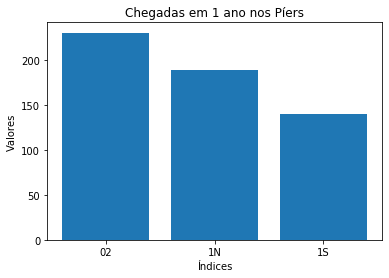

In [29]:

#Número de chegadas em cada terminal
pier = base_dados['Píer'].value_counts()
plot_bar(pier.index, pier.values, 'Chegadas em 1 ano nos Píers')

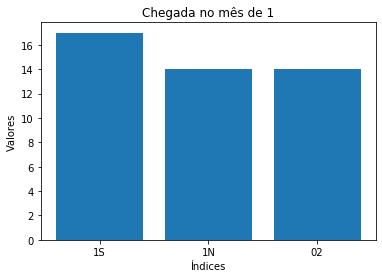

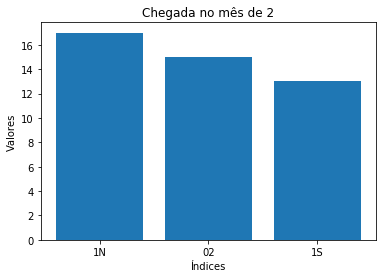

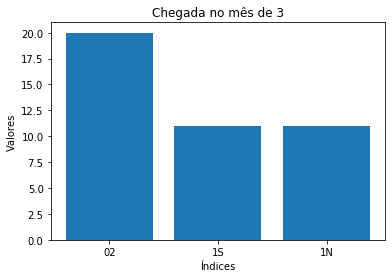

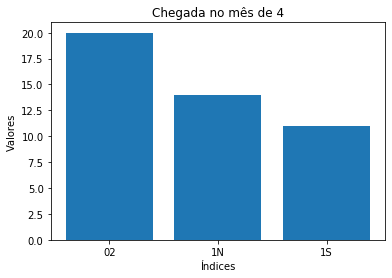

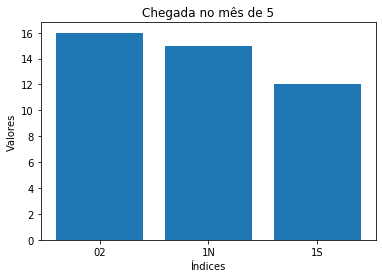

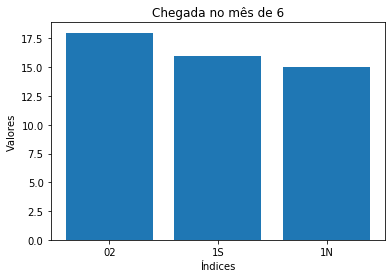

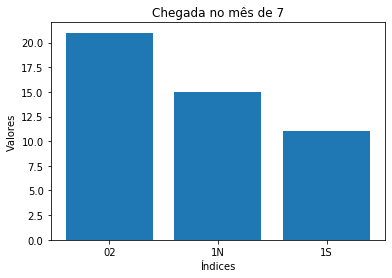

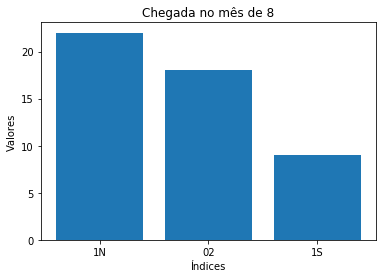

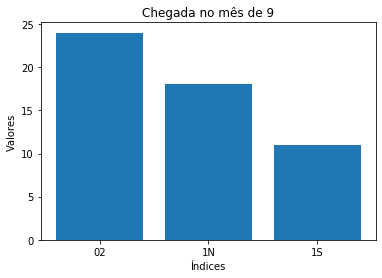

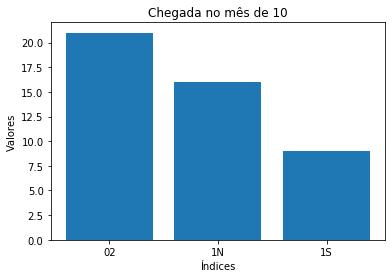

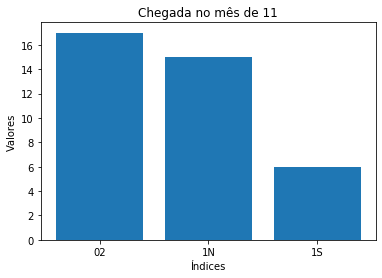

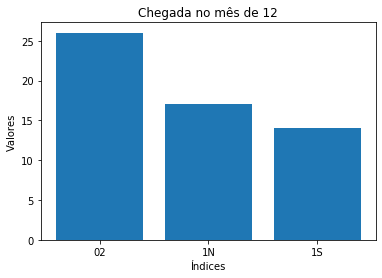

In [30]:
#Número de chegadas em cada terminal por mês
dados_mensal = base_dados.groupby('Mês')
for name, group in dados_mensal:
    chegadas_pier = group['Píer'].value_counts()
    nome = 'Chegada no mês de ' + str(name)
    plot_bar(chegadas_pier.index, chegadas_pier.values, nome)

      OPE 1  OPE 2  OPE 3  OPE 4  OPE Total
SSFT  229.0  119.0    7.0    2.0      357.0
AF08  100.0   50.0    4.0    1.0      155.0
RM20   59.0    2.0    0.0    0.0       61.0
SFHT   58.0   11.0    0.0    0.0       69.0
LONT   32.0   18.0    0.0    0.0       50.0
AS08   22.0   10.0    0.0    0.0       32.0
PFPT   22.0    1.0    0.0    0.0       23.0
AF50   19.0    7.0    0.0    0.0       26.0
RH20    7.0    0.0    0.0    0.0        7.0
PFFT    4.0    6.0    2.0    0.0       12.0
FF80    3.0    0.0    0.0    0.0        3.0
AS50    3.0    3.0    0.0    0.0        6.0
AFOP    1.0    0.0    0.0    0.0        1.0


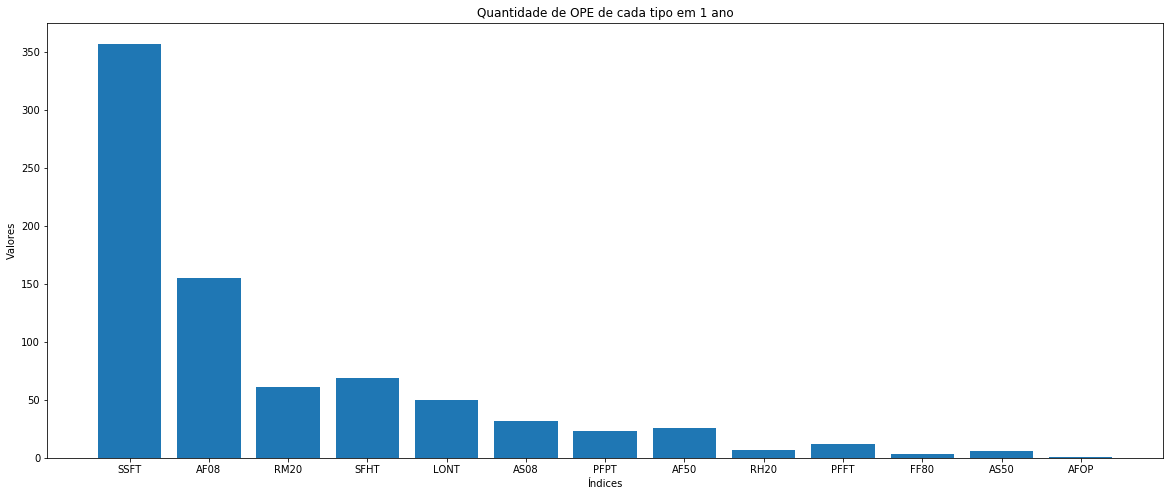

In [31]:
#Número de operações
OPE = pd.concat([OPE1,OPE2,OPE3,OPE4], axis = 1)
OPE = OPE.fillna(0)
OPE['OPE Total'] = OPE.sum(axis = 1)
OPE.drop(index = 'Nenhum', inplace = True)
print(OPE)
plt.figure(figsize = (20,8))
plot_bar(OPE['OPE Total'].index, OPE['OPE Total'].values, 'Quantidade de OPE de cada tipo em 1 ano')

Observa-se que tem dois tipos de operação que ocorrem com muita frequência a SSFT e a AF08, uma informação adicional útil seria a quantidade de tonelagem recebida em cada operação e quais píers realizam qual operação.

In [32]:
grupo_OPE1 = base_dados.groupby('OPE 1')
nome_operacoes = {}
for name , group in grupo_OPE1:
    valor = group['DWT'].sum(axis = 0)
    nome_operacoes[name] = valor
operacoes = pd.DataFrame.from_dict(nome_operacoes, orient= 'index', columns= ['Tonelagem'])
OPE = pd.concat([OPE,operacoes], axis = 1)
OPE

,OPE 1,OPE 2,OPE 3,OPE 4,OPE Total,Tonelagem
SSFT,229.0,119.0,7.0,2.0,357.0,49449559.5
AF08,100.0,50.0,4.0,1.0,155.0,17033320.2
RM20,59.0,2.0,0.0,0.0,61.0,6106415.9
SFHT,58.0,11.0,0.0,0.0,69.0,14974570.0
LONT,32.0,18.0,0.0,0.0,50.0,4967679.7
AS08,22.0,10.0,0.0,0.0,32.0,4330828.0
PFPT,22.0,1.0,0.0,0.0,23.0,8525426.9
AF50,19.0,7.0,0.0,0.0,26.0,3580458.1
RH20,7.0,0.0,0.0,0.0,7.0,400801.0
PFFT,4.0,6.0,2.0,0.0,12.0,873393.0


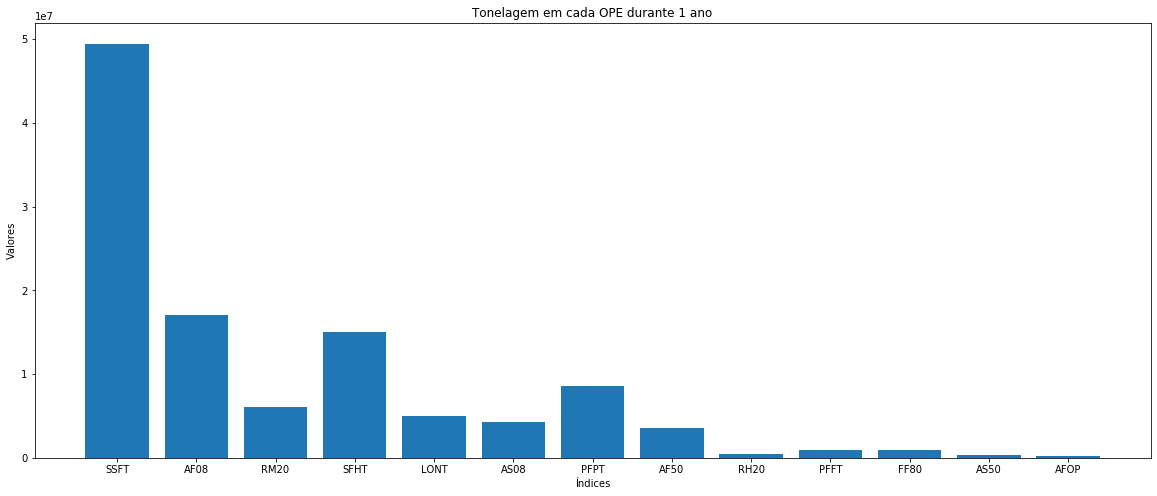

In [33]:
plt.figure(figsize = (20,8))
plot_bar(OPE['Tonelagem'].index, OPE['Tonelagem'].values, 'Tonelagem em cada OPE durante 1 ano')

Com esse gráfico é possível observar que a operação SSFT e AF08 que são as duas com maior número de operações representam as com maior tonelagem de carga transportada, contudo outras operações como a SFHT e a PFPT que tem menor número de operações, movimentam uma quantidade de carga considerável.

In [34]:
base_dados.head()

,index,Emb.,Píer,DWT,Tons Plano 1,Qtde. Movimentada 1,OPE 1,Tons Plano 2,Qtde. Movimentada 2,OPE 2,...,Início,Término,Desatracação,TX CO,TX EF,Estadia,Pre Op,Pos Op,Mês,Dias_Estadia
0,3,2014-11693,02,176508.0,58100,58138,SSFT,114777,115287,SSFT,...,2015-01-01 21:15:00,2015-01-02 13:00:00,2015-01-02 14:15:00,5829.411765,11797.619048,22 D 00:25',12.750000,1.250000,1,22.017361
1,22,2014-11635,1S,82951.0,79682,79288,SSFT,0,0,0,...,2015-01-16 05:13:00,2015-01-17 13:07:00,2015-01-17 13:40:00,2421.007634,8216.373057,30 D 13:34',0.300000,0.550000,1,30.565278
2,1,2014-11601,1N,57903.0,41537,41537,AF08,0,0,0,...,2014-12-31 19:45:00,2015-01-01 07:01:00,2015-01-01 09:20:00,3020.872727,5769.027778,10 D 18:38',0.166667,2.316667,1,10.776389
3,2,2014-11600,1S,53828.0,38608,38659,AF08,0,0,0,...,2015-01-01 16:40:00,2015-01-02 03:20:00,2015-01-02 05:20:00,2917.660377,7340.316456,10 D 21:32',0.583333,2.000000,1,10.897222
4,13,2014-11639,1N,175101.0,85000,85609,AF08,40000,39398,SSFT,...,2015-01-09 00:10:00,2015-01-10 07:06:00,2015-01-10 08:10:00,3896.322078,7075.867925,17 D 05:27',0.083333,1.066667,1,17.227083


Text(0.5, 1.0, 'Movimentação do porto em 1 ano')

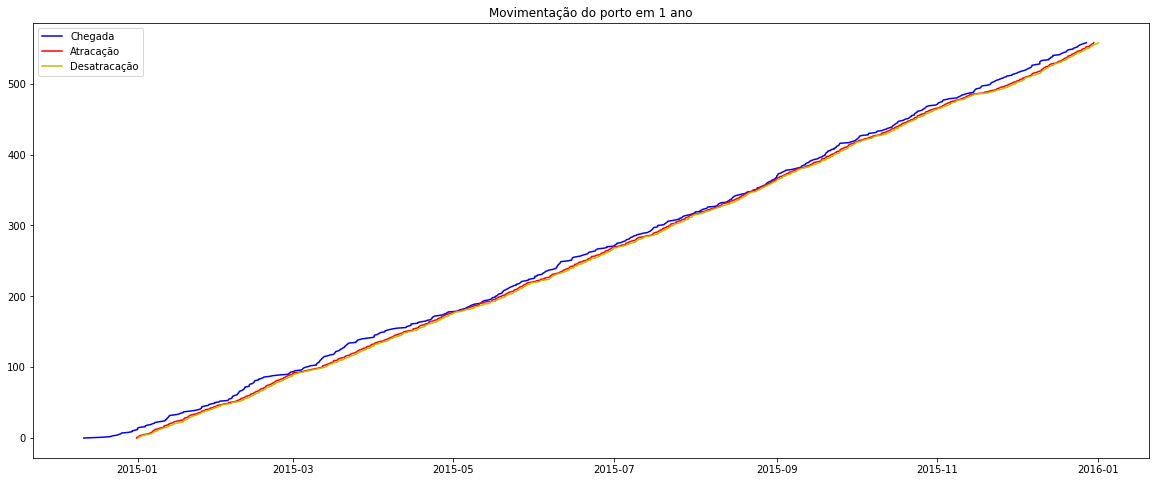

In [35]:
def ordenar_valores(base_dados, nome):
    dados = base_dados[nome].sort_values()
    dados = dados.reset_index()
    return dados
def plot_grafico(base_dados,coluna,cor):
    plt.plot(base_dados[coluna].values, base_dados[coluna].index, cor)
plt.figure(figsize = (20,8))
plt.plot(base_dados['Chegada'].values, base_dados['Chegada'].index, 'b')
atracacao = base_dados['Atracação'].sort_values()
atracacao = atracacao.reset_index()
plt.plot(atracacao['Atracação'].values, atracacao['Atracação'].index, 'r')
desatracacao = ordenar_valores(base_dados, 'Desatracação')
plot_grafico(desatracacao, 'Desatracação', 'y')
plt.legend( ['Chegada', 'Atracação', 'Desatracação'])
plt.title('Movimentação do porto em 1 ano')

Observa-se uma movimentação anual com o traçado de uma reta, contudo em um ano não está sendo possível visualizar com maior detalhes a movimentação

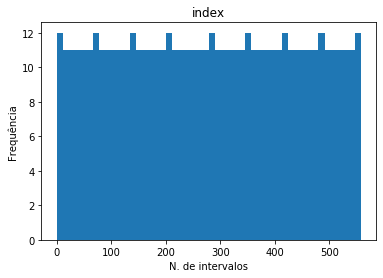

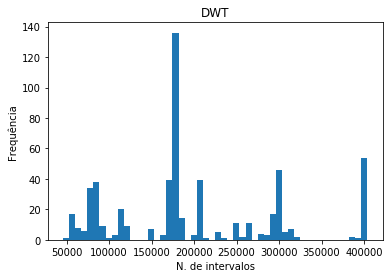

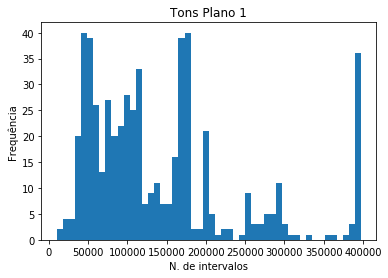

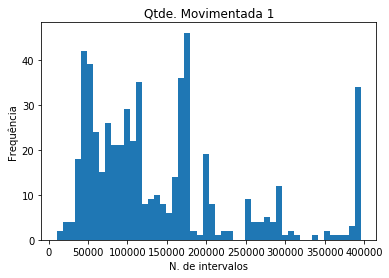

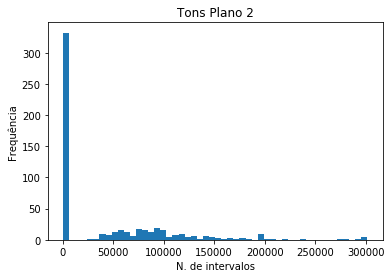

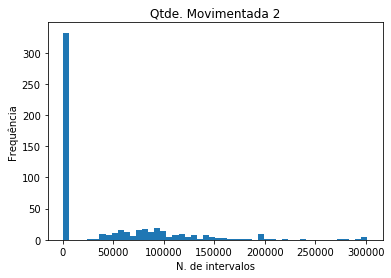

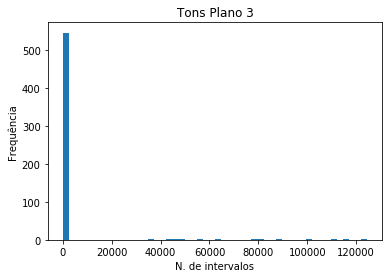

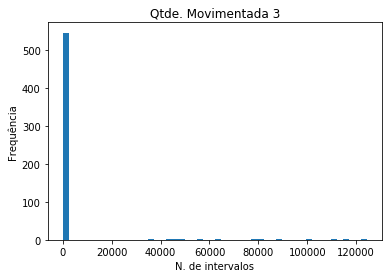

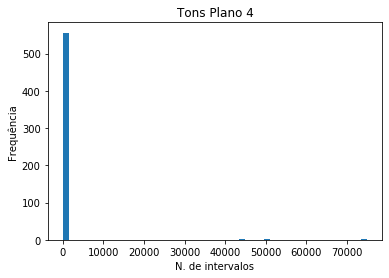

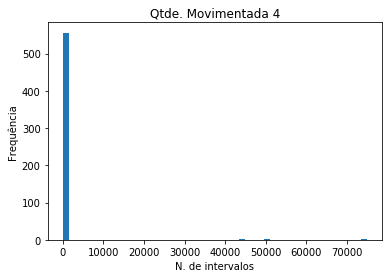

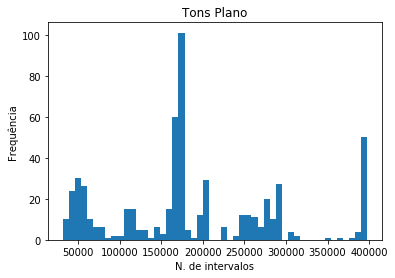

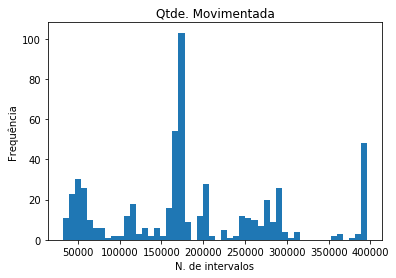

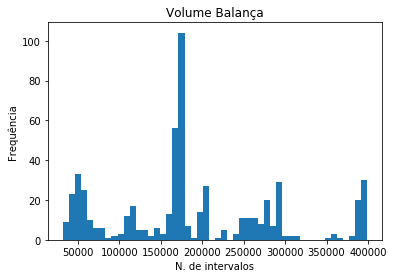

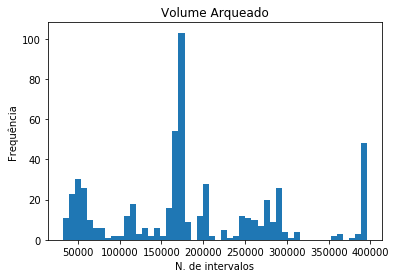

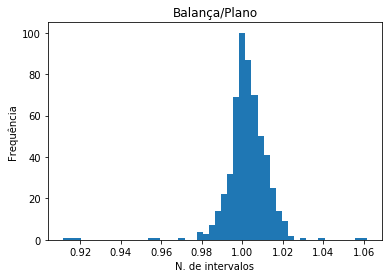

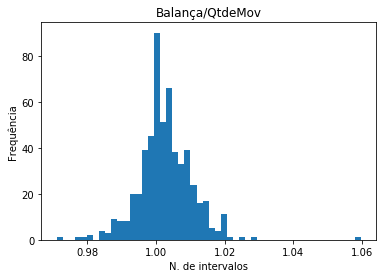

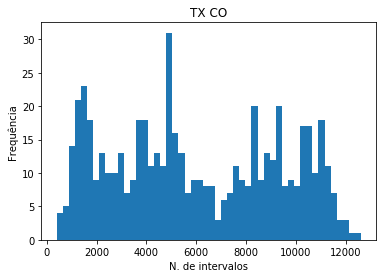

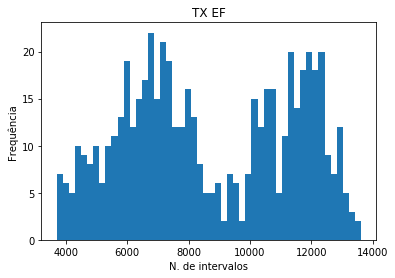

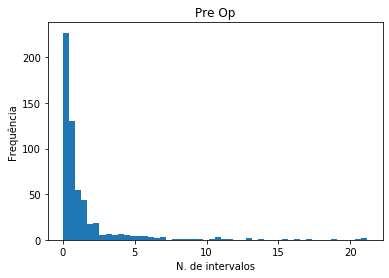

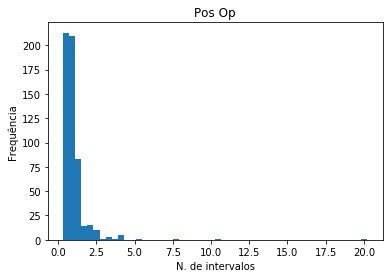

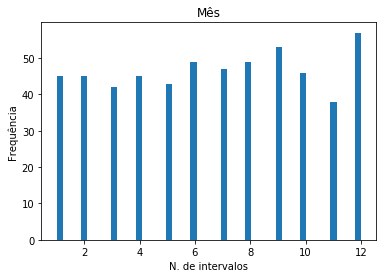

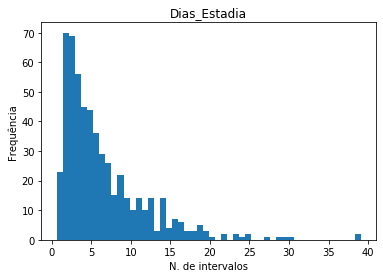

In [36]:
#Histogramas das distribuições que foram verificadas no item 2
for dias_chegada in nome_estatistica_conj_dados:
    plot_histograms(base_dados[dias_chegada], 50, dias_chegada)

Das distribuições, observa-se que a Balança/Plano e a Balança/QtdeMov tem aproximadamente uma distribuição normal em torno do ponto $1$ e que o tempo de estadia tem uma distribuição exponencial.

## 4. Limpeza dos dados

Até o momento não foi necessário realizar nenhum retirada de dados do conjuto de dados, para verificar se existe ocorrência de outliers será utilizado os gráficos de boxplots.

In [37]:
def plot_boxplot(base_dados, nome_grafico):
    plt.boxplot(base_dados)
    plt.xlabel('N. de intervalos')
    plt.ylabel('Frequência')
    plt.title(nome_grafico)
    plt.show()

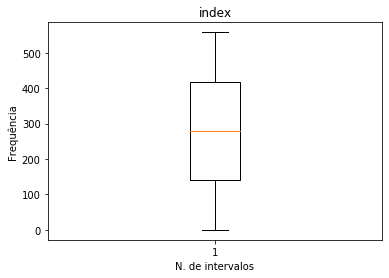

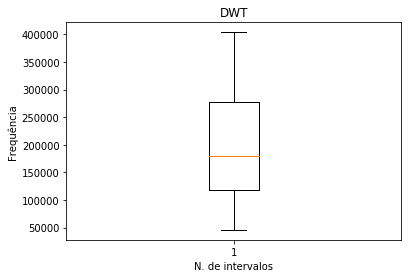

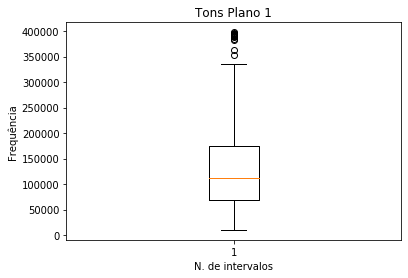

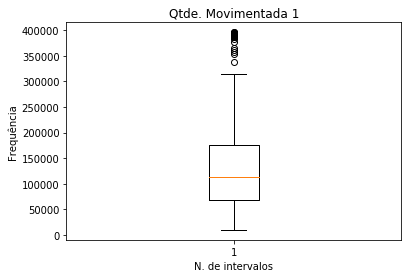

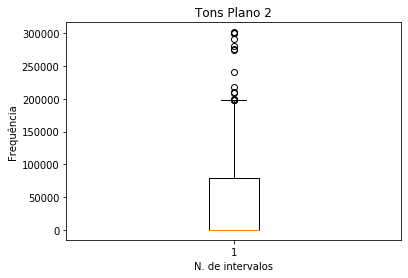

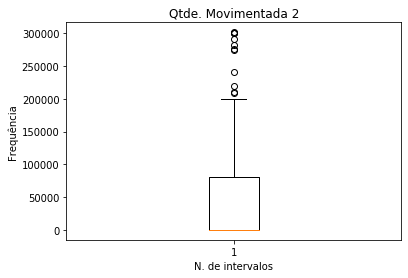

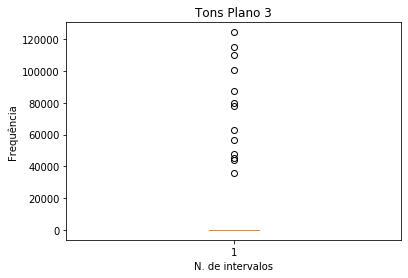

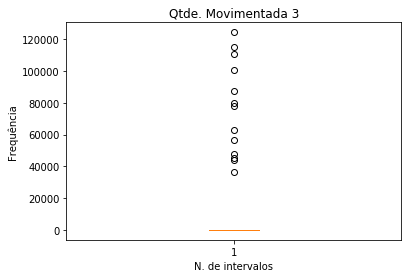

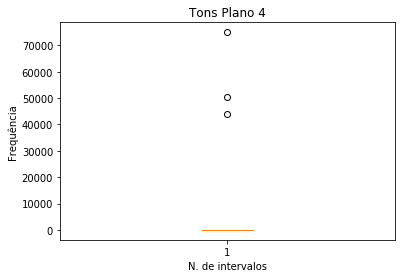

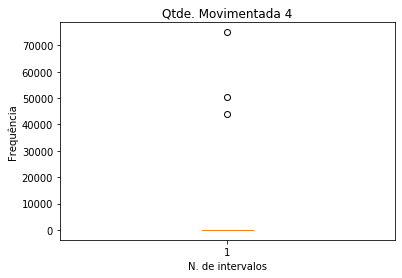

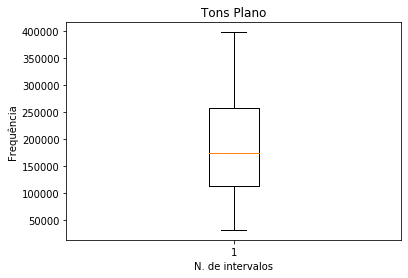

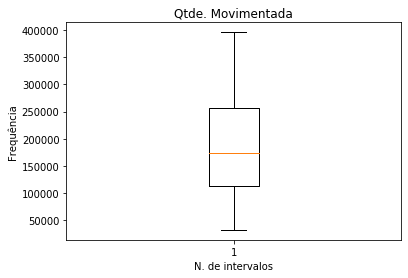

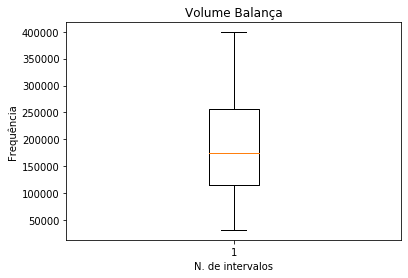

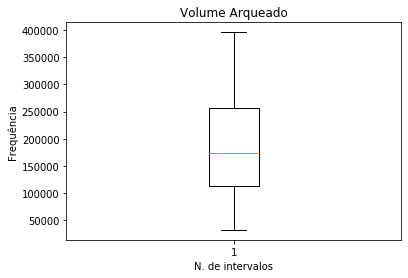

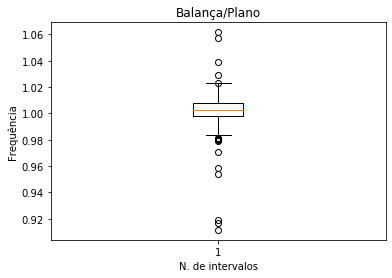

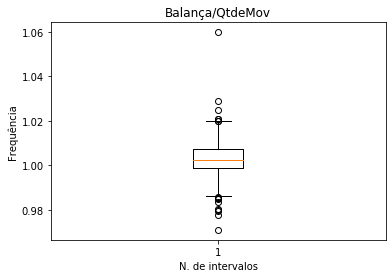

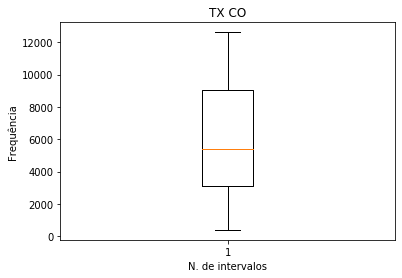

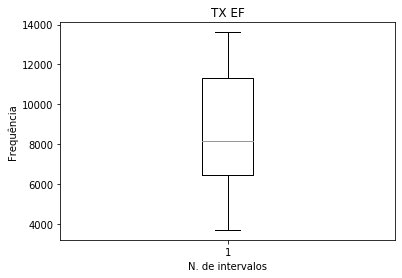

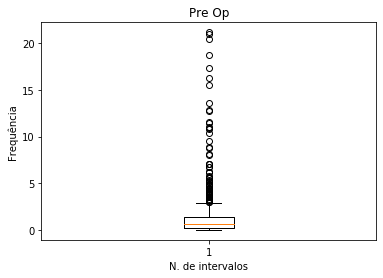

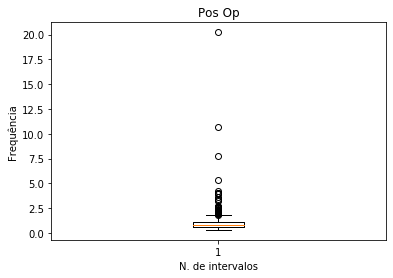

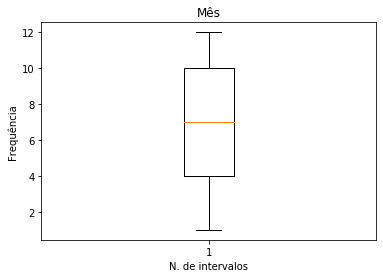

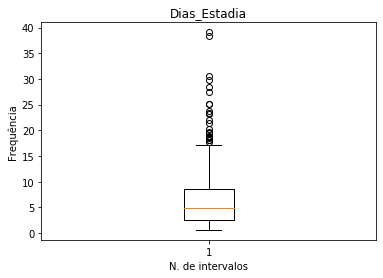

In [38]:
for column in nome_estatistica_conj_dados:
    plot_boxplot(base_dados[column], column)

Algumas observações surgem da análise do conjunto de dados:

<ul>
<li>Apesar das disparidades no boxplot, as colunas mais críticas que estão relacionadas a Tons. Plano, Qtde. Movimentada e OPE não esão incorretas, quando os valores são muito diferentes, isto ocorre pois aquela operação foi responsável por toda a tonelagem do navio e se a tonelagem do navio for baixa ou alta, acaba que os valores se tornam extremos, mas não incorretos.</li>
<li>Nos pontos relacionado a tempo como o Pre Op e o Dias_Estadia, os valores fora da faixa dos quartis na verdade servem como motivo de atenção para avaliar o porquê aquela operaçãp demorar tanto tempo.</li>
</ul>

## 5. Agrupamentos

Um agrupamento interessante seria continuar vizualiando as informações relacionadas a chegada de navios mensalmente.

In [39]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
import seaborn as sb

As análises serão feitas por: tipo de operação, dwt e pier

In [40]:
# Ordena o dataframe por tipos de operaçã, dwt e pier

df_ordenado_ope1 = base_dados.sort_values(by='OPE 1')
df_ordenado_dwt = base_dados.sort_values(by='DWT')
df_ordenado_pier = base_dados.sort_values(by='Píer')

# Listas que armazenam os tipos de operações e piers
tipo_operacoes1 = df_ordenado_ope1['OPE 1'].values
piers = df_ordenado_pier['Píer'].values

# Retirando do dataframe dados que não se deseja analisar
df_ordenado_ope1 = df_ordenado_ope1.drop(['Emb.','Píer','Tons Plano 1', 'Qtde. Movimentada 1','Tons Plano 2', 'Qtde. Movimentada 2','Tons Plano 3', 'Qtde. Movimentada 3','Tons Plano 4', 'Qtde. Movimentada 4','OPE 1','OPE 2','OPE 3', 'OPE 4', 'Aceite', 'Chegada', 'Atracação', 'Início', 'Término', 'Desatracação', 'Estadia'],axis = 1)
df_ordenado_dwt = df_ordenado_dwt.drop(['Emb.','Píer','Tons Plano 1', 'Qtde. Movimentada 1','Tons Plano 2', 'Qtde. Movimentada 2','Tons Plano 3', 'Qtde. Movimentada 3','Tons Plano 4', 'Qtde. Movimentada 4','OPE 1','OPE 2','OPE 3', 'OPE 4', 'Aceite', 'Chegada', 'Atracação', 'Início', 'Término', 'Desatracação', 'Estadia'],axis = 1)
df_ordenado_pier = df_ordenado_pier.drop(['Emb.','Píer','Tons Plano 1', 'Qtde. Movimentada 1','Tons Plano 2', 'Qtde. Movimentada 2','Tons Plano 3', 'Qtde. Movimentada 3','Tons Plano 4', 'Qtde. Movimentada 4','OPE 1','OPE 2','OPE 3', 'OPE 4', 'Aceite', 'Chegada', 'Atracação', 'Início', 'Término', 'Desatracação', 'Estadia'],axis = 1)

In [41]:
# Testando combinações de dados
df1 = df_ordenado_ope1.drop(['TX CO', 'TX EF', 'Pre Op', 'Pos Op', 'Mês', 'Dias_Estadia'], axis = 1)
df2 = df_ordenado_ope1.drop(['DWT', 'Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)
df3 = df1.drop(['Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado'], axis = 1)
df4 = df_ordenado_ope1.drop(['TX CO', 'TX EF', 'Dias_Estadia','Balança/Plano', 'Balança/QtdeMov', 'Mês','Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)

df5 = df_ordenado_pier.drop(['DWT', 'Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)
df6 = df_ordenado_pier.drop(['TX CO', 'TX EF', 'Dias_Estadia','Balança/Plano', 'Balança/QtdeMov', 'Mês','Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)

df7 = df_ordenado_dwt.drop(['DWT', 'Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)
df8 = df_ordenado_dwt.drop(['TX CO', 'TX EF', 'Dias_Estadia','Balança/Plano', 'Balança/QtdeMov', 'Mês','Tons Plano', 'Qtde. Movimentada', 'Volume Balança', 'Volume Arqueado', 'Balança/Plano', 'Balança/QtdeMov'], axis = 1)

In [42]:
tipos_op = OPE.index
print(tipos_op)
num_ope = len(tipos_op)

# São 3 piers
# Classes de navio: 5 (Panamax, Aframax, Suezmax, VLCC e ULCC)

Index(['SSFT', 'AF08', 'RM20', 'SFHT', 'LONT', 'AS08', 'PFPT', 'AF50', 'RH20',
       'PFFT', 'FF80', 'AS50', 'AFOP'],
      dtype='object')


In [43]:
# Transformando em array
X = np.array(df_ordenado_ope1)
X1 = np.array(df1)
X2 = np.array(df2)
X3 = np.array(df3)
X4 = np.array(df4)
X5 = np.array(df5)
X6 = np.array(df6)
X7 = np.array(df7)
X8 = np.array(df8)

# Serão usados 14 clusters, com o objetivo de se encontrar todos os tipos
kmeansX = KMeans(n_clusters=14, random_state=0)
kmeansX.fit(X)
kmeansX.labels_

kmeansX1 = KMeans(n_clusters=14, random_state=0)
kmeansX1.fit(X1)
kmeansX1.labels_

kmeansX2 = KMeans(n_clusters=14, random_state=0)
kmeansX2.fit(X2)
kmeansX2.labels_

kmeansX3 = KMeans(n_clusters=14, random_state=0)
kmeansX3.fit(X3)
kmeansX3.labels_

kmeansX4 = KMeans(n_clusters=14, random_state=0)
kmeansX4.fit(X4)
kmeansX4.labels_

# Tentar encaixar nos 3 piers
kmeansX5 = KMeans(n_clusters=3, random_state=0)
kmeansX5.fit(X5)
kmeansX5.labels_

kmeansX6 = KMeans(n_clusters=3, random_state=0)
kmeansX6.fit(X6)
kmeansX6.labels_

# Tentar encaixar nas 5 classes (Panamax, Aframax, Suezmax, VLCC e ULCC) > Panamax foi retirada, portanto 4
kmeansX7 = KMeans(n_clusters=4, random_state=0)
kmeansX7.fit(X7)
kmeansX7.labels_

kmeansX8 = KMeans(n_clusters=4, random_state=0)
kmeansX8.fit(X8)
#kmeansX8.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [44]:
# Adicionando o dado das classes encontradas
df_ordenado_ope1['K-classes'] = kmeansX.labels_
df1['K-classes'] = kmeansX1.labels_
df2['K-classes'] = kmeansX2.labels_
df3['K-classes'] = kmeansX3.labels_
df4['K-classes'] = kmeansX4.labels_
df5['K-classes'] = kmeansX5.labels_
df6['K-classes'] = kmeansX6.labels_
df7['K-classes'] = kmeansX7.labels_
df8['K-classes'] = kmeansX8.labels_

In [45]:
# Plotando os resultados de 1
#sb.pairplot(df1,'K-classes')

In [46]:
# Plotando os resultados de 2
#sb.pairplot(df2,'K-classes')

C:\Users\diogo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


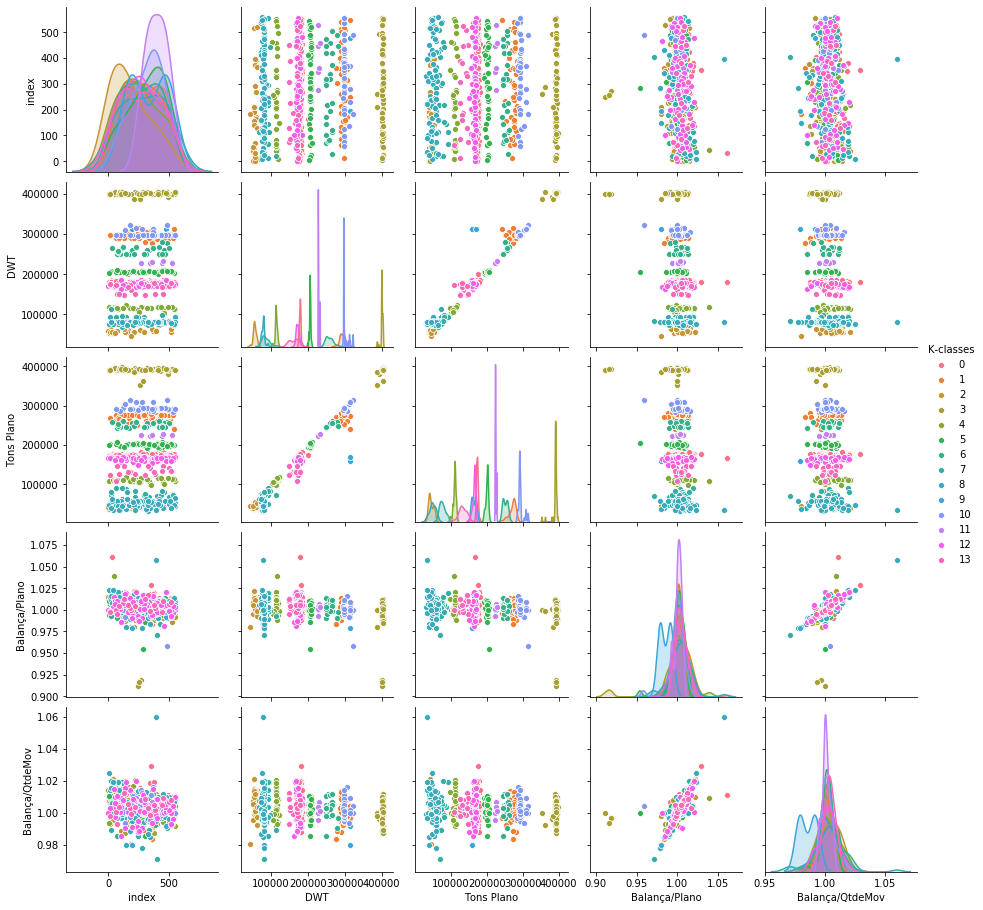

In [47]:
# Plotando os resultados de 3
sb.pairplot(df3,'K-classes')

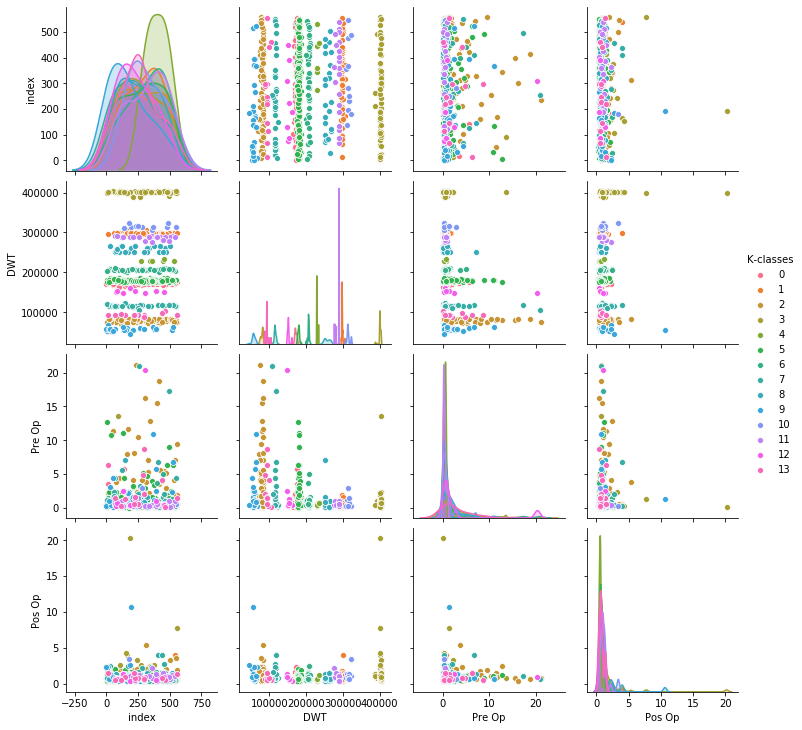

In [48]:
# Plotando os resultados de 4
sb.pairplot(df4,'K-classes')

Os dados usados para essa plotagem foram ordenados segundo o tipo de operação: 'SSFT', 'AF08', 'RM20', 'SFHT', 'LONT', 'AS08', 'PFPT', 'AF50', 'RH20','PFFT', 'FF80', 'AS50', 'AFOP'. Entretanto, não é possivel encontram uma ordem nos labels gerados. Portanto, não é possível associá-los aos clusters encontrados. 

In [49]:
kmeansX4.labels_

array([ 5,  2,  9,  8,  1,  0,  2,  5,  4, 11,  0,  0,  5,  9,  0,  2,  1,
        1,  2,  1,  5, 11,  0,  2,  4,  7,  8,  1,  2, 13, 13, 12,  7,  2,
        5,  8, 13,  1,  2,  5,  9,  3,  3,  8,  2,  9,  5,  6,  0,  5,  2,
        5,  6,  8,  8, 12,  5,  0,  3,  9, 12,  6,  6,  5,  2,  6,  6,  2,
        5,  6,  0,  5,  9,  2,  5,  5,  9,  2,  0,  9,  9,  6,  8,  9,  5,
        9,  9,  0, 10,  5,  9,  0, 13,  0,  9,  9,  5, 10,  1, 10,  5,  6,
        6,  5,  5,  5,  5,  0,  5,  0,  0,  5,  5,  6,  5, 11,  5,  5,  5,
        5, 11, 11,  0,  5,  5,  5,  6,  6,  5, 11,  5,  0,  5,  2,  5,  5,
        5,  1,  5,  5,  5,  5,  5,  2,  2,  3,  3,  0,  2, 13,  8,  7,  2,
        7, 13, 11,  2,  1,  7,  7,  5, 13,  7,  4,  1,  7,  2,  1, 13,  2,
        1,  1,  7,  2,  7,  5, 13,  2,  1,  2,  6,  2,  5,  3,  3,  1,  3,
        3,  3,  3,  3,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  9,  9,  9,  9,  9,  9,  9,  2,  6,  2,  9,  2,  2,  2,  2,
        2,  2,  2,  2,  2

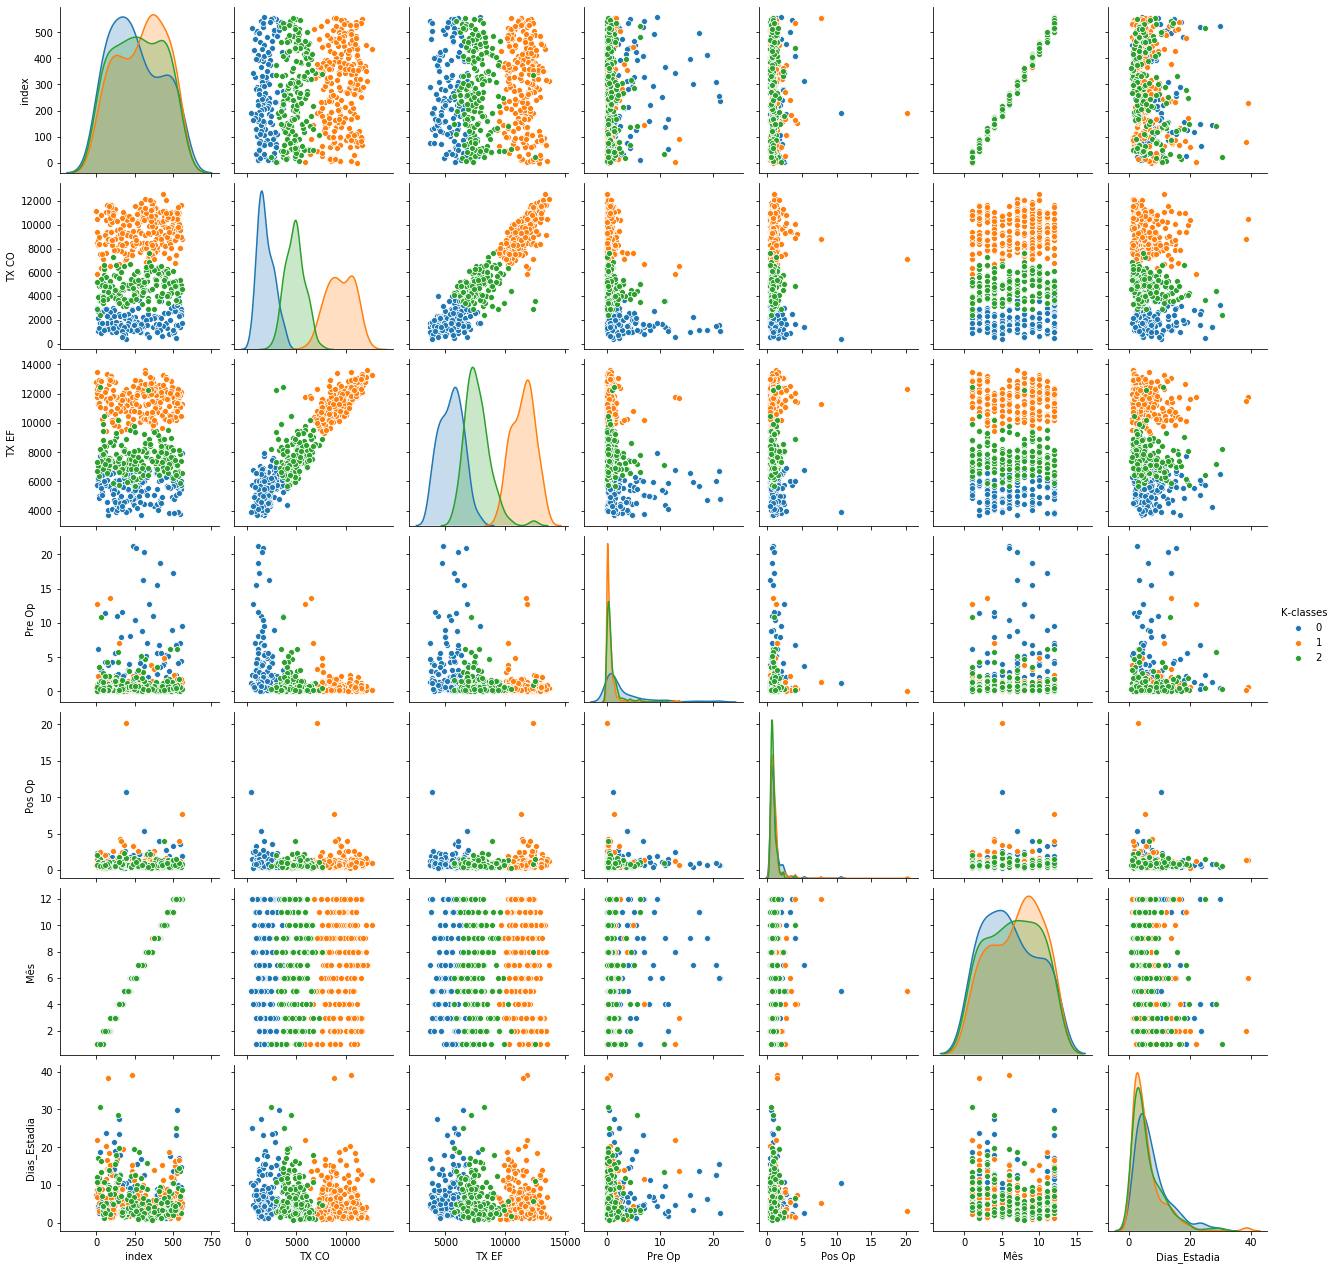

In [50]:
# Plotando os resultados de 5
sb.pairplot(df5,'K-classes')

In [61]:
kmeansX5.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,

Como os piers foram ordenados em 02, 1N e 1S, pode-se fazer a relação das classes de k como: 02-2, 1N-0 e 1S-1. Para o píer 02, as taxas comerciais foram superiores a 8k e as efetivas superiores a 10k. Para o pier 1N, as taxas comerciais ficaram entre 8k e 10k e as efetivas entre 6k a 10k. Para o pier 1S, as taxas comerciais foram menores que 3k e as efetivas de 4k a 7k. 

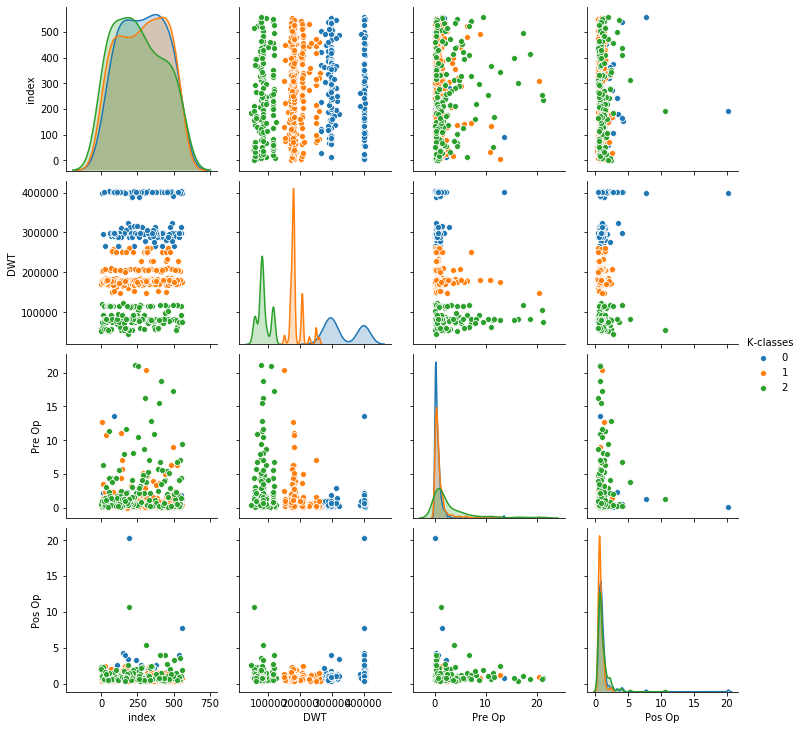

In [52]:
# Plotando os resultados de 6
sb.pairplot(df6,'K-classes')

In [53]:
kmeansX6.labels_

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,

Como os piers foram ordenados em 02, 1N e 1S, pode-se fazer a relação das classes de k como: 02-0, 1N-1 e 1S-2. Nota-se aqui que os navios maiores (acima de 300k DWT) são recebidos pelo píer 02, os médios (150k a 250k DWT) são recebidos pelo píer 1N e os menores (até 120k DWT) pelo píer 1S.

Tal resultado faz sentido com o resultado anterior, já que as taxas comercial/efetiva, são maiores no pier 02, que recebe os maiores navios, menores no pier 1S, que recebe os menores navios, e médias no pier 1N.

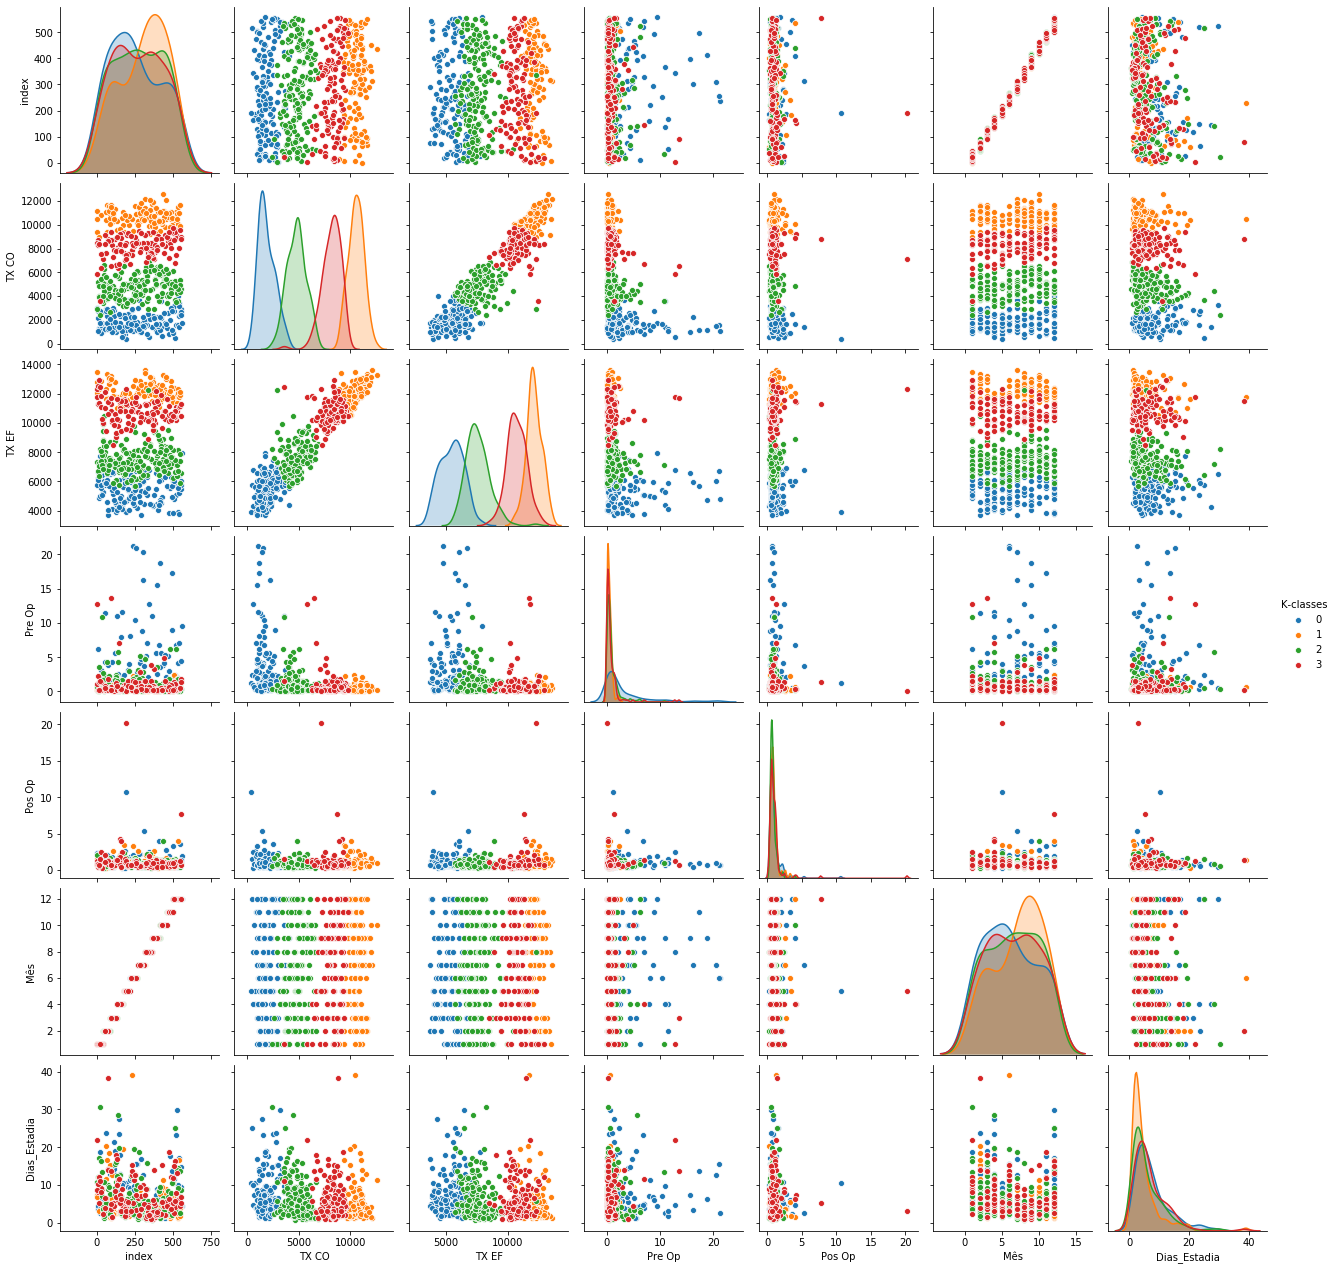

In [54]:
# Plotando os resultados de 7
sb.pairplot(df7,'K-classes')

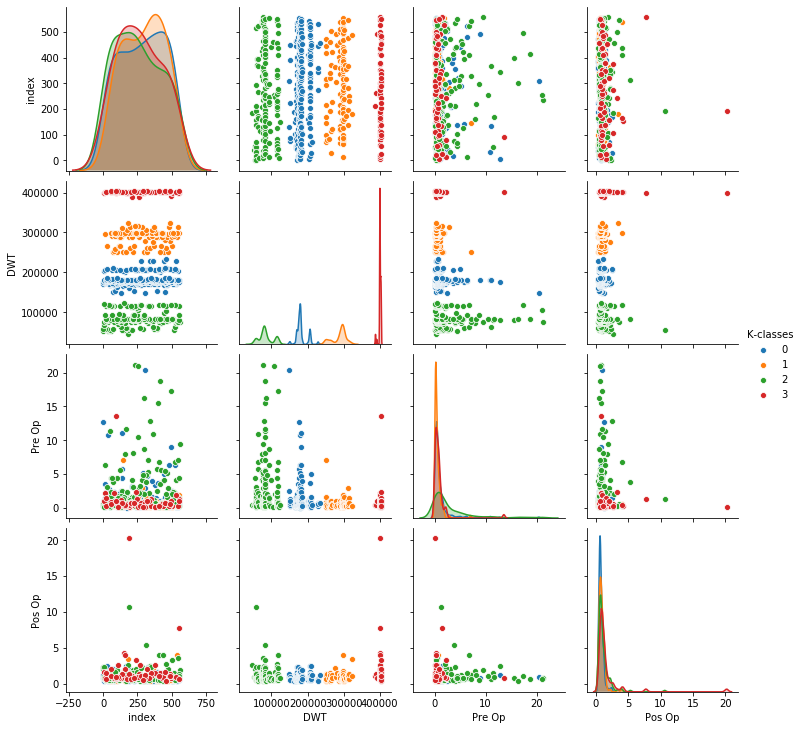

In [56]:
# Plotando os resultados de 8
sb.pairplot(df8,'K-classes')

Pode-se observar que as classes se encaixaram nas categorias de navios: Verde-Aframax, Azul-Suezmax, Laranja-VLCC, Vermelho-ULCC. 

Entretanto, houveram alguns navios de porte VLCC que foram categorizados como azul (Suezmax).

## 6. Distribuição de Probabilidades

Para verificação da distribuição de probabilidades, utilizou-se três colunas que no estágio 3 de vizualização de dados demonstraram ter uma distribuição de probabilidades mais comportada, estes foram:
<ul>
    <li>Dias_Estadia</li>
    <li>Balança/Plano</li>
    <li>Balança/QtdMov</li>
</ul>

Esse código foi retirado do https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1

p value for norm = 2.5589059375082396e-12
p value for expon = 0.00011360741790468145
Best fitting distribution: expon
Best p value: 0.00011360741790468145
Parameters for the best fit: (0.6173611111111111, 5.85403498310475)


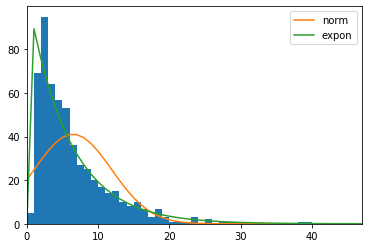

In [57]:
import scipy.stats as st
import numpy as np
import scipy

def get_best_distribution(data,dist_names):
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

def plot_distribuicao(base_dados, dist_names):
    size = 559
    x = np.arange(size)
    y = base_dados
    h = plt.hist(y, bins=range(50))

    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(y)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
        plt.plot(pdf_fitted, label=dist_name)
        plt.xlim(0,47)
    plt.legend(loc='upper right')
    plt.show()
dist_names = ["norm", "expon"]
dist_dias_estadia =get_best_distribution(base_dados['Dias_Estadia'], dist_names)
plot_distribuicao(base_dados['Dias_Estadia'], dist_names)

O segundo parâmetro é chamado scale e tem a seguinte fórmula:
$$scale = \frac{1}{\lambda}$$
Logo o $\lambda$ dessa distribuição é:
$$\lambda=0,1708$$

In [58]:
dist_balanca = get_best_distribution(base_dados['Balança/Plano'], dist_names)

p value for norm = 2.77888230417171e-07
p value for expon = 2.6964132659022575e-146
Best fitting distribution: norm
Best p value: 2.77888230417171e-07
Parameters for the best fit: (1.0023813687026992, 0.011192264252056402)


A columna Balança/Plano está com uma distribuição normal com média 1.002 e variância 0,01119

In [59]:
dist_balanca = get_best_distribution(base_dados['Balança/QtdeMov'], dist_names)

p value for norm = 0.03420432167679738
p value for expon = 5.816316578153392e-92
Best fitting distribution: norm
Best p value: 0.03420432167679738
Parameters for the best fit: (1.002721882819784, 0.00774006726001072)


A columna Balança/QtdMov está com uma distribuição normal com média 1.002 e variância 0,0077

In [60]:
#criar o conjunto de dados tratado
base_dados.to_csv('Base Dados Navio P1-3421', sep = ';')

In [1]:
#gerar o pdf
!pip install nbconvert
!pip install xelatex

ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
